### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier
import ma_note_bot

### Load Data

In [2]:
pd.set_option('display.max_columns', 50)

X = pd.read_csv("X_train.csv", index_col = 'id')
y = pd.read_csv('y_train.csv', index_col = 'id')
X_test = pd.read_csv('X_test.csv', index_col = 'id')
df = pd.concat([X, y], axis = 1)
drop_col = set()

### Knowing the variables

In [3]:
shape = df.shape
print("Our dataset contains of {} raws and {} columns".format(shape[0], shape[1]))

Our dataset contains of 59400 raws and 40 columns


In [4]:
df.head(3)

amount_tsh date_recorded        funder  gps_height     installer  \
id                                                                        
69572      6000.0    2011-03-14         Roman        1390         Roman   
8776          0.0    2013-03-06       Grumeti        1399       GRUMETI   
34310        25.0    2013-02-25  Lottery Club         686  World vision   

       longitude  latitude     wpt_name  num_private          basin  \
id                                                                    
69572  34.938093 -9.856322         none            0     Lake Nyasa   
8776   34.698766 -2.147466     Zahanati            0  Lake Victoria   
34310  37.460664 -3.821329  Kwa Mahundi            0        Pangani   

      subvillage   region  region_code  district_code        lga      ward  \
id                                                                           
69572   Mnyusi B   Iringa           11              5     Ludewa  Mundindi   
8776     Nyamara     Mara           20              2  Serengeti     Natta   
34310    Majengo  Manyara           21              4  Simanjiro   Ngorika   

       population public_meeting              recorded_by scheme_management  \
id                                                                            
69572         109           True  GeoData Consultants Ltd               VWC   
8776          280            NaN  GeoData Consultants Ltd             Other   
34310         250           True  GeoData Consultants Ltd               VWC   

                       scheme_name permit  construction_year extraction_type  \
id                                                                             
69572                        Roman  False               1999         gravity   
8776                           NaN   True               2010         gravity   
34310  Nyumba ya mungu pipe scheme   True               2009         gravity   

      extraction_type_group extraction_type_class management management_group  \
id                                                                              
69572               gravity               gravity        vwc       user-group   
8776                gravity               gravity        wug       user-group   
34310               gravity               gravity        vwc       user-group   

              payment payment_type water_quality quality_group      quantity  \
id                                                                             
69572    pay annually     annually          soft          good        enough   
8776        never pay    never pay          soft          good  insufficient   
34310  pay per bucket   per bucket          soft          good        enough   

      quantity_group                source           source_type source_class  \
id                                                                              
69572         enough                spring                spring  groundwater   
8776    insufficient  rainwater harvesting  rainwater harvesting      surface   
34310         enough                   dam                   dam      surface   

                   waterpoint_type waterpoint_type_group status_group  
id                                                                     
69572           communal standpipe    communal standpipe   functional  
8776            communal standpipe    communal standpipe   functional  
34310  communal standpipe multiple    communal standpipe   functional

In [5]:
df.tail(2)

amount_tsh date_recorded      funder  gps_height installer  longitude  \
id                                                                             
31282         0.0    2011-03-08       Malec           0      Musa  35.861315   
26348         0.0    2011-03-23  World Bank         191     World  38.104048   

       latitude         wpt_name  num_private        basin    subvillage  \
id                                                                         
31282 -6.378573           Mshoro            0       Rufiji        Mwinyi   
26348 -6.747464  Kwa Mzee Lugawa            0  Wami / Ruvu  Kikatanyemba   

         region  region_code  district_code             lga          ward  \
id                                                                          
31282    Dodoma            1              4        Chamwino  Mvumi Makulu   
26348  Morogoro            5              2  Morogoro Rural    Ngerengere   

       population public_meeting              recorded_by scheme_management  \
id                                                                            
31282           0           True  GeoData Consultants Ltd               VWC   
26348         150           True  GeoData Consultants Ltd               VWC   

      scheme_name permit  construction_year extraction_type  \
id                                                            
31282         NaN   True                  0     nira/tanira   
26348         NaN   True               2002     nira/tanira   

      extraction_type_group extraction_type_class management management_group  \
id                                                                              
31282           nira/tanira              handpump        vwc       user-group   
26348           nira/tanira              handpump        vwc       user-group   

                     payment payment_type water_quality quality_group  \
id                                                                      
31282              never pay    never pay          soft          good   
26348  pay when scheme fails   on failure         salty         salty   

           quantity quantity_group        source   source_type source_class  \
id                                                                            
31282  insufficient   insufficient  shallow well  shallow well  groundwater   
26348        enough         enough  shallow well  shallow well  groundwater   

      waterpoint_type waterpoint_type_group status_group  
id                                                        
31282       hand pump             hand pump   functional  
26348       hand pump             hand pump   functional

### Description of variables:

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private - Description is empty, but variable is useless (spoiler).
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint
* status_group - label



In [6]:
types = df.dtypes.unique()
print("Data contains {} types of variables: {}, {}, {}".format(len(types), types[0], types[1], types[2]))

Data contains 3 types of variables: float64, object, int64


In [7]:
cat_columns = df.select_dtypes(['object']).columns
cat_desc = df[cat_columns].describe().transpose()
cat_desc['inv_p_of_freq'] = (1 - cat_desc['freq']/cat_desc['count']).astype('float32').round(3)
cat_desc.sort_values('inv_p_of_freq', ascending  = ['False'])


count unique                      top   freq  \
recorded_by            59400      1  GeoData Consultants Ltd  59400   
public_meeting         56066      2                     True  51011   
management_group       59400      5               user-group  52490   
quality_group          59400      6                     good  50818   
water_quality          59400      8                     soft  50818   
source_class           59400      3              groundwater  45794   
permit                 56344      2                     True  38852   
management             59400     12                      vwc  40507   
scheme_management      55523     12                      VWC  36793   
waterpoint_type_group  59400      6       communal standpipe  34625   
quantity_group         59400      5                   enough  33186   
quantity               59400      5                   enough  33186   
status_group           59400      3               functional  32259   
waterpoint_type        59400      7       communal standpipe  28522   
extraction_type_class  59400      7                  gravity  26780   
extraction_type_group  59400     13                  gravity  26780   
extraction_type        59400     18                  gravity  26780   
payment                59400      7                never pay  25348   
payment_type           59400      7                never pay  25348   
installer              55745   2145                      DWE  17402   
source                 59400     10                   spring  17021   
source_type            59400      7                   spring  17021   
basin                  59400      9            Lake Victoria  10248   
funder                 55765   1897   Government Of Tanzania   9084   
region                 59400     21                   Iringa   5294   
wpt_name               59400  37400                     none   3563   
lga                    59400    125                   Njombe   2503   
scheme_name            31234   2696                        K    682   
date_recorded          59400    356               2011-03-15    572   
subvillage             59029  19287                 Madukani    508   
ward                   59400   2092                    Igosi    307   

                       inv_p_of_freq  
recorded_by                    0.000  
public_meeting                 0.090  
management_group               0.116  
quality_group                  0.144  
water_quality                  0.144  
source_class                   0.229  
permit                         0.310  
management                     0.318  
scheme_management              0.337  
waterpoint_type_group          0.417  
quantity_group                 0.441  
quantity                       0.441  
status_group                   0.457  
waterpoint_type                0.520  
extraction_type_class          0.549  
extraction_type_group          0.549  
extraction_type                0.549  
payment                        0.573  
payment_type                   0.573  
installer                      0.688  
source                         0.713  
source_type                    0.713  
basin                          0.827  
funder                         0.837  
region                         0.911  
wpt_name                       0.940  
lga                            0.958  
scheme_name                    0.978  
date_recorded                  0.990  
subvillage                     0.991  
ward                           0.995

In [8]:
num_columns = df.select_dtypes(include=[np.number]).columns
df[num_columns].describe().transpose()

count         mean          std       min        25%  \
amount_tsh         59400.0   317.650385  2997.574558   0.00000   0.000000   
gps_height         59400.0   668.297239   693.116350 -90.00000   0.000000   
longitude          59400.0    34.077427     6.567432   0.00000  33.090347   
latitude           59400.0    -5.706033     2.946019 -11.64944  -8.540621   
num_private        59400.0     0.474141    12.236230   0.00000   0.000000   
region_code        59400.0    15.297003    17.587406   1.00000   5.000000   
district_code      59400.0     5.629747     9.633649   0.00000   2.000000   
population         59400.0   179.909983   471.482176   0.00000   0.000000   
construction_year  59400.0  1300.652475   951.620547   0.00000   0.000000   

                           50%          75%           max  
amount_tsh            0.000000    20.000000  3.500000e+05  
gps_height          369.000000  1319.250000  2.770000e+03  
longitude            34.908743    37.178387  4.034519e+01  
latitude             -5.021597    -3.326156 -2.000000e-08  
num_private           0.000000     0.000000  1.776000e+03  
region_code          12.000000    17.000000  9.900000e+01  
district_code         3.000000     5.000000  8.000000e+01  
population           25.000000   215.000000  3.050000e+04  
construction_year  1986.000000  2004.000000  2.013000e+03

In [9]:
df[num_columns].astype('object').describe().transpose()

count   unique           top     freq
amount_tsh         59400.0     98.0  0.000000e+00  41639.0
gps_height         59400.0   2428.0  0.000000e+00  20438.0
longitude          59400.0  57516.0  0.000000e+00   1812.0
latitude           59400.0  57517.0 -2.000000e-08   1812.0
num_private        59400.0     65.0  0.000000e+00  58643.0
region_code        59400.0     27.0  1.100000e+01   5300.0
district_code      59400.0     20.0  1.000000e+00  12203.0
population         59400.0   1049.0  0.000000e+00  21381.0
construction_year  59400.0     55.0  0.000000e+00  20709.0

### Target:

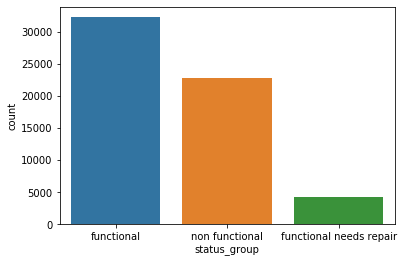

In [10]:
balance = df['status_group'].value_counts()
sns.countplot(x='status_group', data=df);

Data has unbalanced classes

### Balancing target:

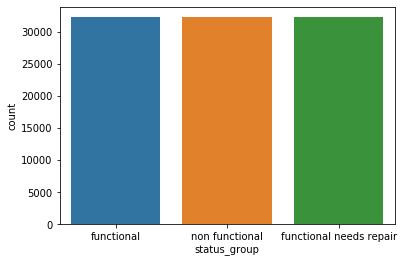

In [11]:
df_func = df[df.status_group == 'functional'] 
df_non_func = df[df.status_group == 'non functional'] 
df_repair = df[df.status_group == 'functional needs repair']
df_non_func_upsampled = resample(df_non_func, n_samples = balance[0],
                                random_state = 42)
df_repair_upsampled = resample(df_repair, n_samples = balance[0],
                                random_state = 42)
df_balanced = pd.concat([df_func, df_non_func_upsampled, df_repair_upsampled])
sns.countplot(x='status_group', data=df_balanced);
df_balanced = df

### Missing values

Train:

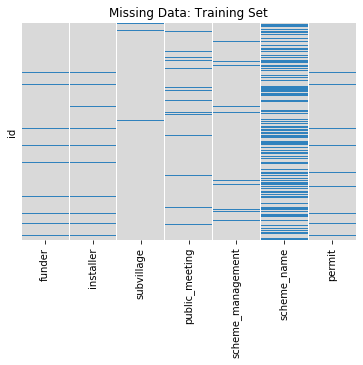

In [12]:
sns.heatmap(df_balanced[df_balanced.columns[df_balanced.isnull().any()]].isnull(),yticklabels = False,
            cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

Test:

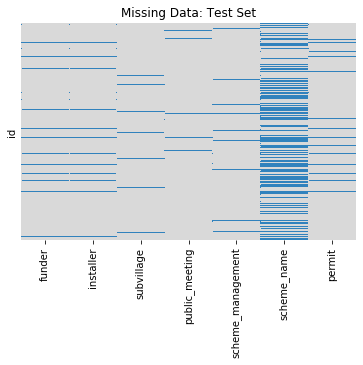

In [13]:
sns.heatmap(X_test[X_test.columns[X_test.isnull().any()]].isnull(),yticklabels = False,
            cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Test Set')
plt.show()

### Outliers

After a StandardScaler, in order to easily compare the data. But this is not necessary for better prediction, because tree-based models will be used.

In [14]:
scaler = StandardScaler()
df_features_scaled = df_balanced.copy()
df_features_scaled[num_columns] =scaler.fit_transform(df_balanced[num_columns].values)
X_test_scaled = X_test.copy()
X_test_scaled[num_columns] = scaler.transform(X_test[num_columns].values)

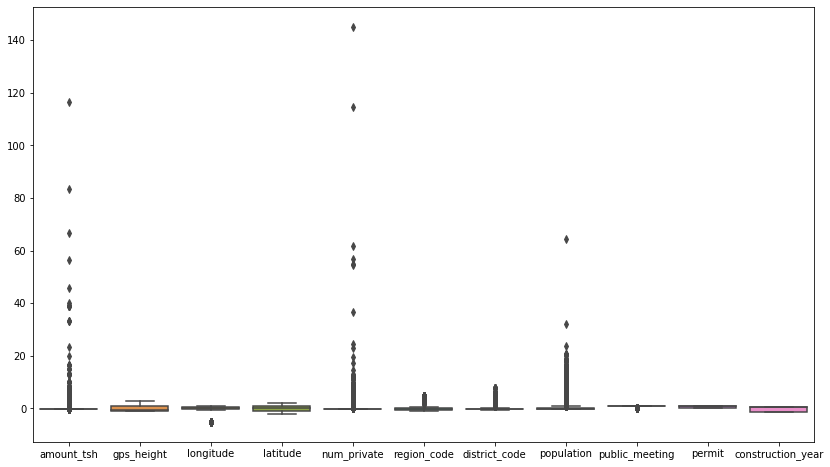

In [15]:
plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_scaled);

Drop outliers raws

Dropped: 460


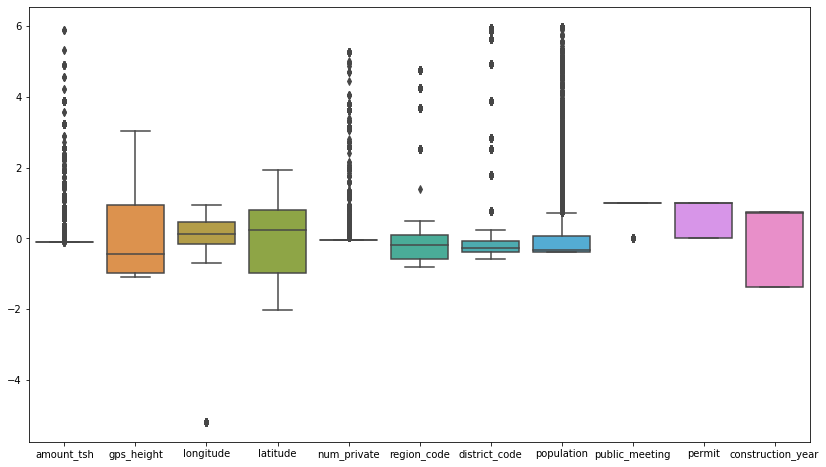

In [16]:
df_features_clean = df_features_scaled.copy()
indexes_to_drop = df_features_clean[:][df_features_clean[num_columns]
                  .apply(lambda x: (np.abs(x - x.mean()) / x.std()) > 6 ).any(axis=1)].index
df_features_clean.drop(indexes_to_drop, axis = 0, inplace = True)
print('Dropped:', df_features_scaled.shape[0] - df_features_clean.shape[0])
plt.figure(figsize=(14,8))
sns.boxplot(data = df_features_clean);

## Numeric Features:

### amount_tsh

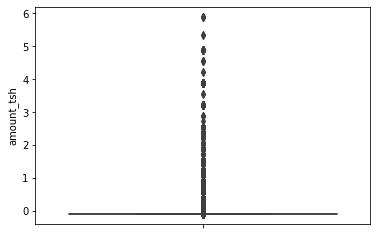

In [17]:
sns.boxplot(x=df_features_clean["amount_tsh"], orient = 'v');

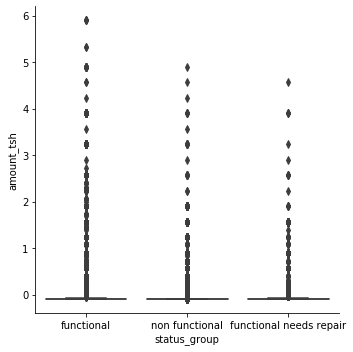

In [18]:
sns.catplot(x="status_group", y="amount_tsh",kind="box", data=df_features_clean);

Add column to **drop_col**

In [19]:
drop_col.add('amount_tsh')

### gps_height

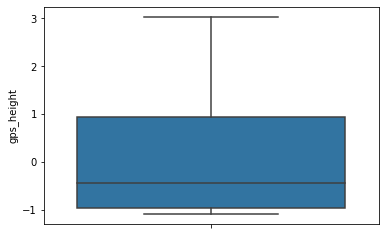

In [20]:
sns.boxplot(x=df_features_clean["gps_height"], orient = 'v');

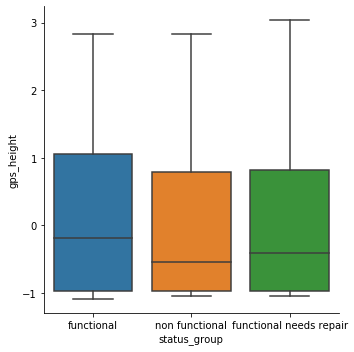

In [21]:
sns.catplot(x="status_group", y="gps_height",kind="box", data=df_features_clean);

### longitude & latitude

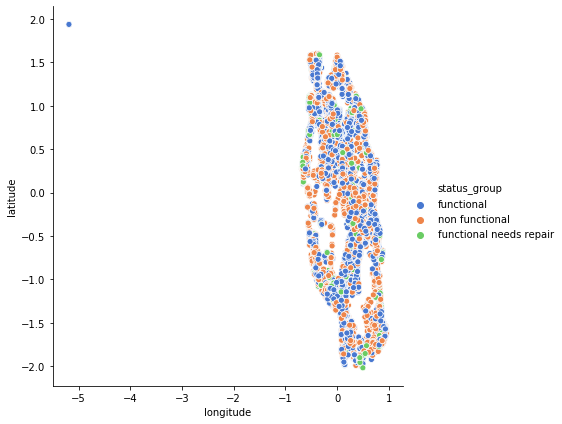

In [22]:
sns.relplot(x="longitude", y="latitude", hue="status_group",
            sizes=(40, 400), palette="muted",
            height=6, data=df_features_clean);

Drop outliers rows

In [23]:
df_features_clean = df_features_clean.drop(df_features_clean[df_features_clean.longitude < -3].index, axis = 0)

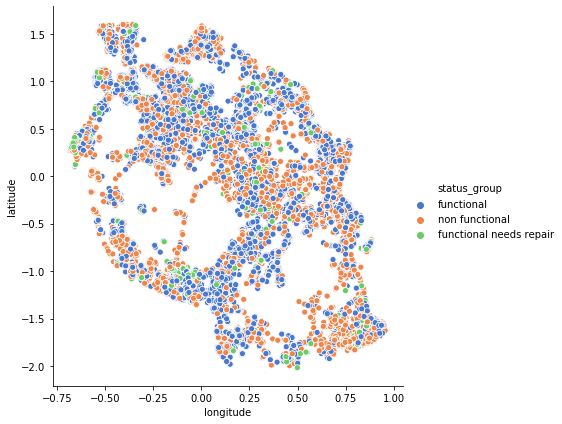

In [24]:
sns.relplot(x="longitude", y="latitude", hue="status_group",
            sizes=(40, 400), palette="muted",
            height=6, data=df_features_clean);

Weak, but may be usefull dependency

### num_private

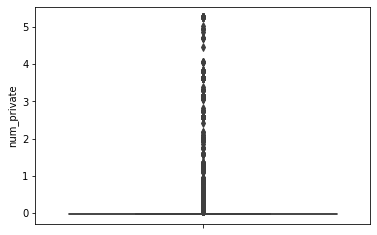

In [25]:
sns.boxplot(x=df_features_clean["num_private"], orient = 'v');

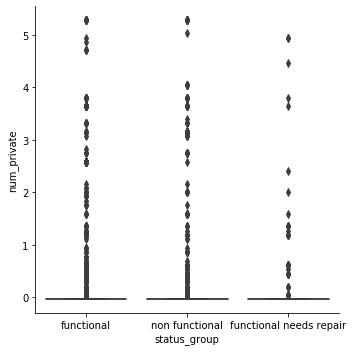

In [26]:
sns.catplot(x="status_group", y="num_private",kind="box", data=df_features_clean);

Add column to **drop_col**

In [27]:
drop_col.add('num_private')

### region_code

In [28]:
df_balanced[['district_code', 'region_code']].head(5)

district_code  region_code
id                               
69572              5           11
8776               2           20
34310              4           21
67743             63           90
19728              1           18

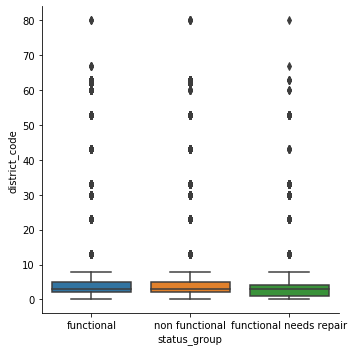

In [29]:
sns.catplot(x="status_group", y="district_code",kind="box", data=df_balanced);

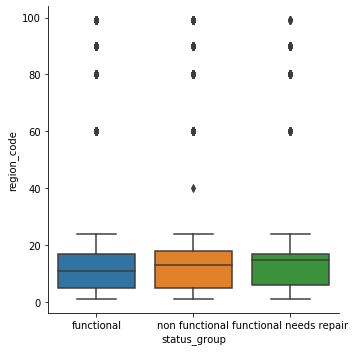

In [30]:
sns.catplot(x="status_group", y="region_code",kind="box", data=df_balanced);

Region and district id. As expected, there is no ordinal dependency with the target variable.

In [31]:
drop_col.add('region_code')
drop_col.add('region_code')

### population

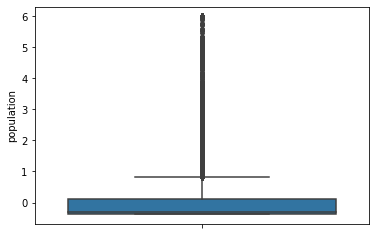

In [32]:
sns.boxplot(x=df_features_clean["population"], orient = 'v');

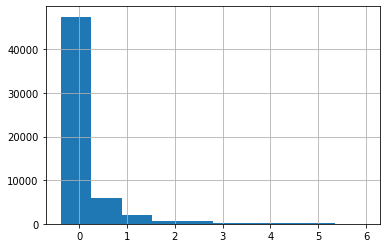

In [33]:
df_features_clean["population"].hist();

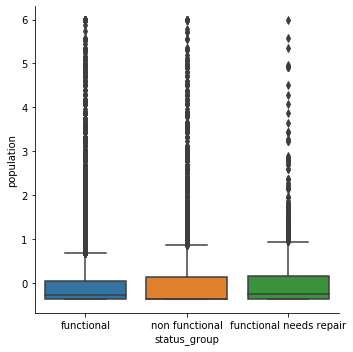

In [34]:
sns.catplot(x="status_group", y="population",kind="box", data=df_features_clean);

In [35]:
df_features_clean['population_boxcox'], fitted_lambda = stats.boxcox((df_features_clean["population"] + 1))
X_test_scaled['population_boxcox'] =stats.boxcox((X_test_scaled["population"] + 1), fitted_lambda)

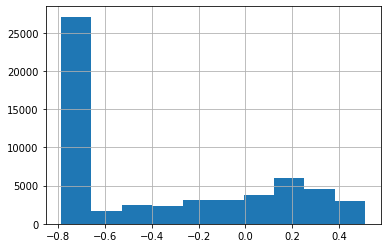

In [36]:
df_features_clean['population_boxcox'].hist();

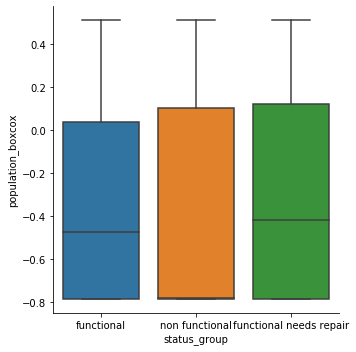

In [37]:
sns.catplot(x="status_group", y="population_boxcox", kind="box", data=df_features_clean);

In [38]:
drop_col.add('population')

### construction_year

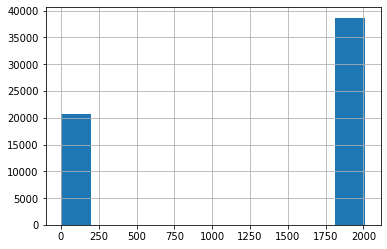

In [39]:
df_balanced["construction_year"].hist()

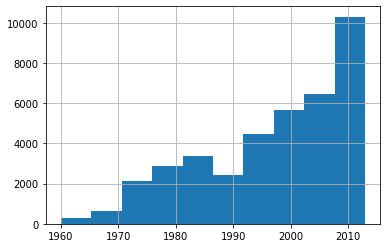

In [40]:
df_cy_2000 = df_balanced[df_balanced["construction_year"] > 1]
df_cy_2000['construction_year'].hist()

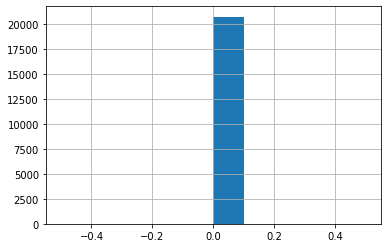

In [41]:
df_cy_0 = df_balanced[df_balanced["construction_year"] < 1]
df_cy_0['construction_year'].hist();

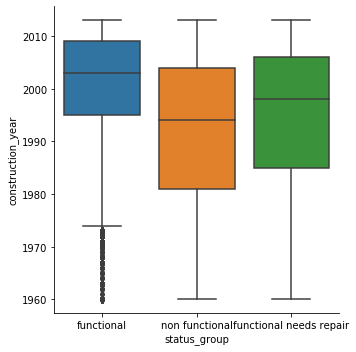

In [42]:
sns.catplot(x="status_group", y="construction_year", kind="box", data=df_cy_2000);

In [43]:
df_cy_0['status_group'].value_counts()

functional                 10555
non functional              8365
functional needs repair     1789
Name: status_group, dtype: int64

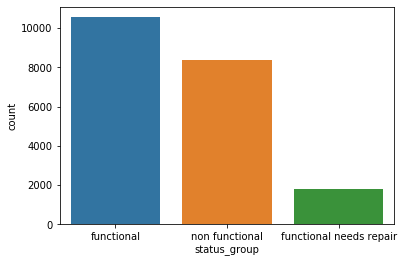

In [44]:
sns.countplot(x="status_group", data=df_cy_0);

Not necessary split columns by border 1 for better prediction, because tree-based models will be used. Weak dependency.

## Categorical Features:

## recorded_by

In [45]:
df_features_clean['recorded_by'].unique()

array(['GeoData Consultants Ltd'], dtype=object)

Only one unique value. Add column to drop_col.

In [46]:
drop_col.add('recorded_by')

## public_meeting

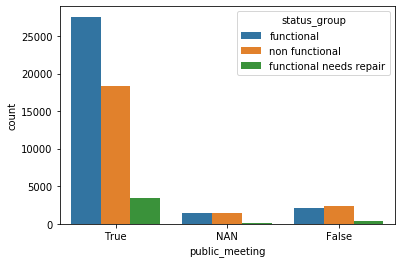

In [47]:
df_features_clean['public_meeting'].fillna('NAN', inplace = True)
X_test_scaled['public_meeting'].fillna('NAN', inplace = True)
sns.countplot(x="public_meeting", hue="status_group", data=df_features_clean);

Weak dependency.Very unbalanced. Add column to drop_col.

## management_group

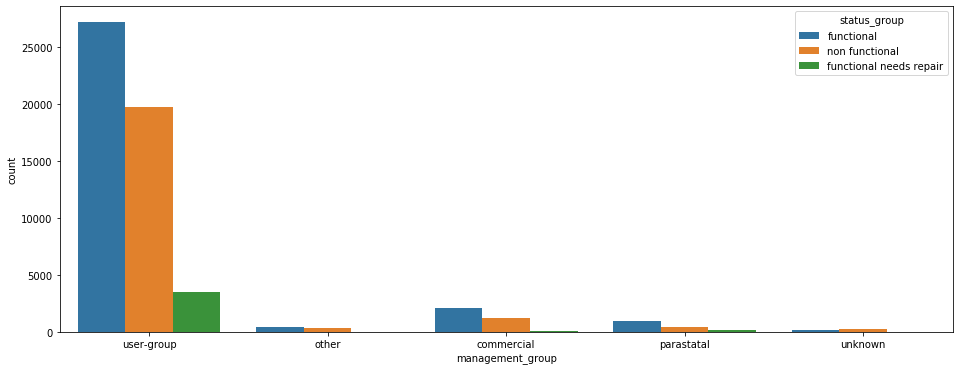

In [48]:
plt.figure(figsize=(16,6))
sns.countplot(x="management_group", hue="status_group", data=df_features_clean);

In [49]:
df_features_clean['management_group_usergroup'] = df_features_clean['management_group'] == 'user-group'

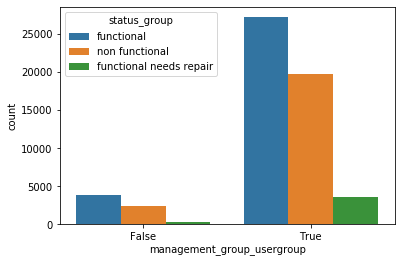

In [50]:
sns.countplot(x="management_group_usergroup", hue="status_group", data=df_features_clean);

Very weak dependency.Very unbalanced. Add column to drop_col.

In [51]:
drop_col.add('management_group_usergroup')

## quality_group

In [52]:
df_features_clean['quality_group'].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'],
      dtype=object)

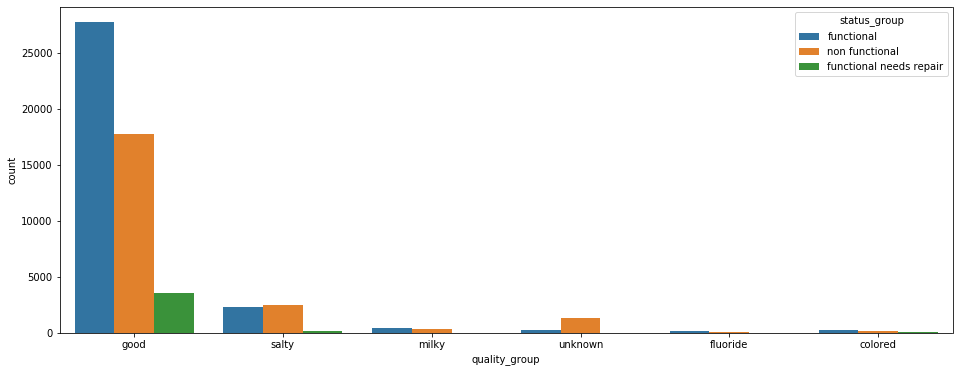

In [53]:
plt.figure(figsize=(16,6))
sns.countplot(x="quality_group", hue="status_group", data=df_features_clean);

In [54]:
df_features_clean['quality_group_good'] = df_features_clean['quality_group'] == 'good'
X_test_scaled['quality_group_good'] = X_test_scaled['quality_group'] == 'good'

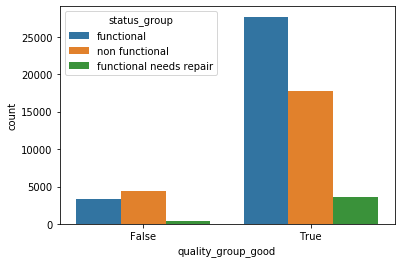

In [55]:
sns.countplot(x="quality_group_good", hue="status_group", data=df_features_clean);

Very unbalanced. But has small dependency.

## water_quality

In [56]:
df_features_clean['water_quality'].unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

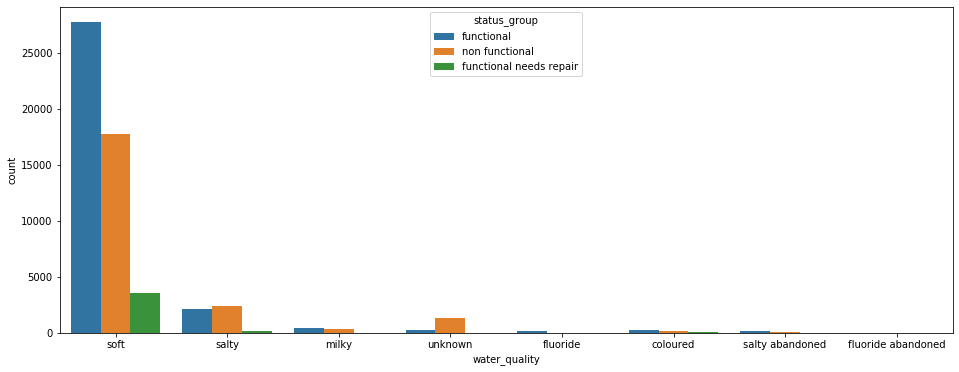

In [57]:
plt.figure(figsize=(16,6))
sns.countplot(x="water_quality", hue="status_group", data=df_features_clean);

In [58]:
df_features_clean['water_quality_soft'] = df_features_clean['water_quality'] == 'soft'
X_test_scaled['water_quality_soft'] = X_test_scaled['water_quality'] == 'soft'

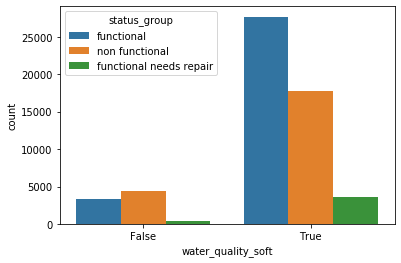

In [59]:
sns.countplot(x="water_quality_soft", hue="status_group", data=df_features_clean);

Very unbalanced. But has small dependency.

## source_class

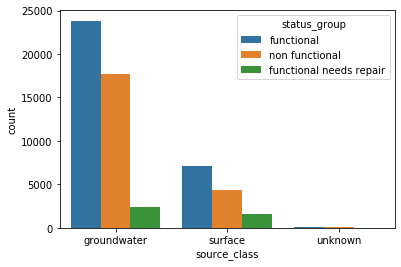

In [60]:
sns.countplot(x="source_class", hue="status_group", data=df_features_clean);

In [61]:
df_features_clean['source_class_ground'] = df_features_clean['source_class'] == 'groundwater'
X_test_scaled['source_class_ground'] = X_test_scaled['source_class'] == 'groundwater'
drop_col.add('source_class')

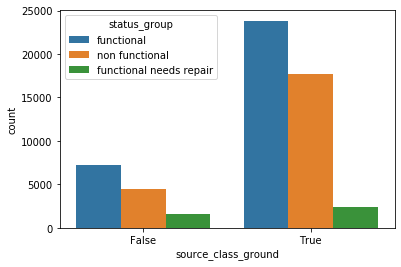

In [62]:
sns.countplot(x="source_class_ground", hue="status_group", data=df_features_clean);

Small dependency.

## permit

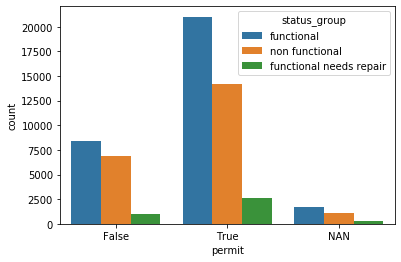

In [63]:
df_features_clean['permit'].fillna('NAN', inplace = True)
X_test_scaled['permit'].fillna('NAN', inplace = True)
sns.countplot(x="permit", hue="status_group", data=df_features_clean);

Weak dependency, with NAN.

## management

In [64]:
df_features_clean['management'].unique()

array(['vwc', 'wug', 'other', 'private operator', 'water board', 'wua',
       'company', 'water authority', 'parastatal', 'unknown',
       'other - school', 'trust'], dtype=object)

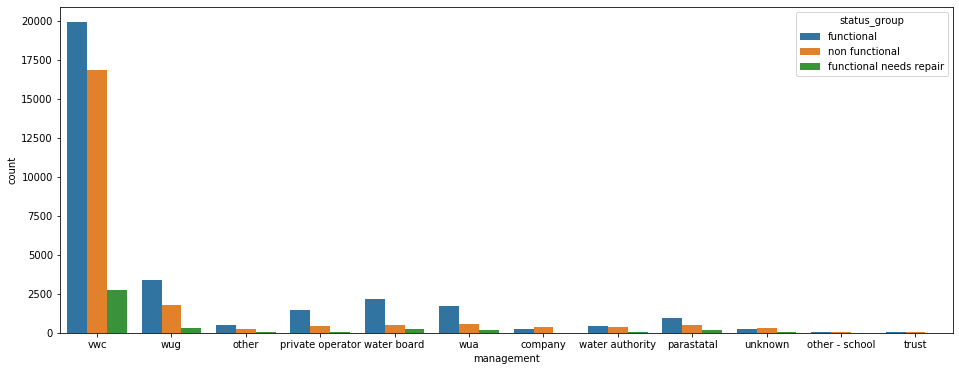

In [65]:
plt.figure(figsize=(16,6))
sns.countplot(x="management", hue="status_group", data=df_features_clean);


In [66]:
df_features_clean['management_fe'] = df_features_clean['management']
X_test_scaled['management_fe'] = X_test_scaled['management']

In [67]:
df_features_clean['management_fe'].replace(['other', 'water authority', 'unknown', 'company', 'trust', 'other - school']
                                           , 'fe1', inplace = True)
df_features_clean['management_fe'].replace(['water board', 'wua', 'parastatal'], 'fe2', inplace = True)

X_test_scaled['management_fe'].replace(['other', 'water authority', 'unknown', 'company', 'trust', 'other - school']
                                           , 'fe1', inplace = True)
X_test_scaled['management_fe'].replace(['water board', 'wua', 'parastatal'], 'fe2', inplace = True)
drop_col.add('management')

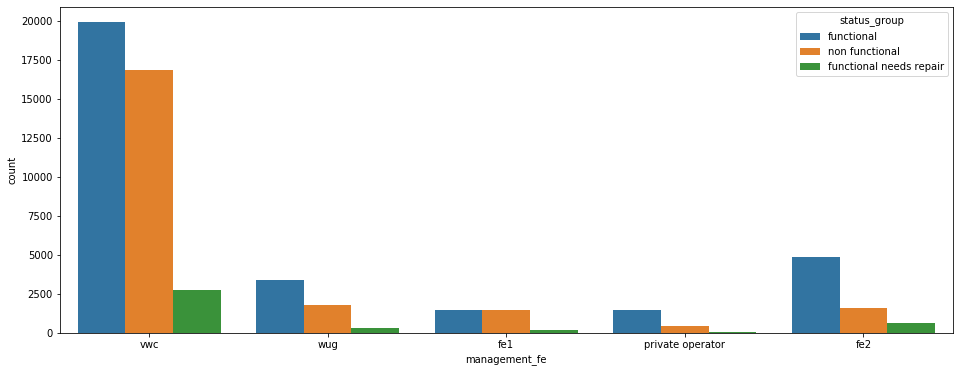

In [68]:
plt.figure(figsize=(16,6))
sns.countplot(x="management_fe", hue="status_group", data=df_features_clean);

## scheme_management

In [69]:
df_features_clean['scheme_management'].unique()

array(['VWC', 'Other', nan, 'Private operator', 'WUG', 'Water Board',
       'WUA', 'Water authority', 'Company', 'Parastatal', 'Trust', 'SWC',
       'None'], dtype=object)

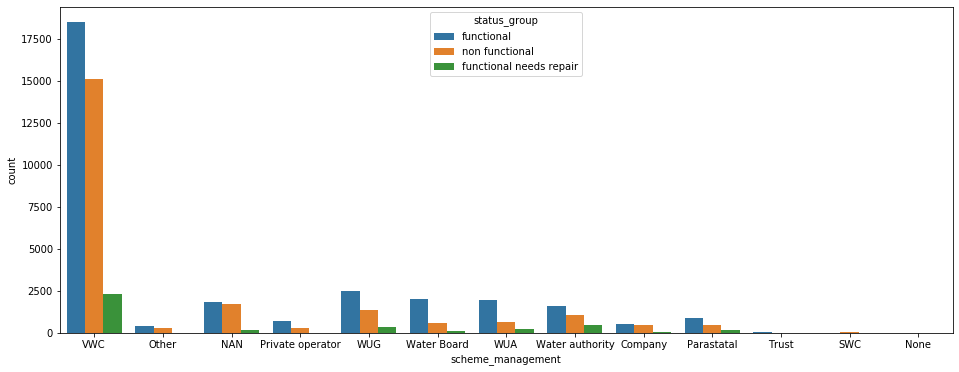

In [70]:
df_features_clean['scheme_management'].fillna('NAN', inplace = True)
X_test_scaled['scheme_management'].fillna('NAN', inplace = True)
plt.figure(figsize=(16,6))
sns.countplot(x="scheme_management", hue="status_group", data=df_features_clean);

In [71]:
df_features_clean['scheme_management_fe'] = df_features_clean['scheme_management']
X_test_scaled['scheme_management_fe'] = X_test_scaled['scheme_management']

In [72]:
df_features_clean['scheme_management_fe'].replace(['Other', 'Private operator', 'Company', 'Trust', 'SWC', 'None', 'NAN']
                                           , 'fe1', inplace = True)
df_features_clean['scheme_management_fe'].replace(['WUG', 'WUA', 'Parastatal']
                                           , 'fe2', inplace = True)

X_test_scaled['scheme_management_fe'].replace(['Other', 'Private operator', 'Company', 'Trust', 'SWC', 'None', 'NAN']
                                           , 'fe1', inplace = True)
X_test_scaled['scheme_management_fe'].replace(['WUG', 'WUA', 'Parastatal']
                                           , 'fe2', inplace = True)
drop_col.add('scheme_management')

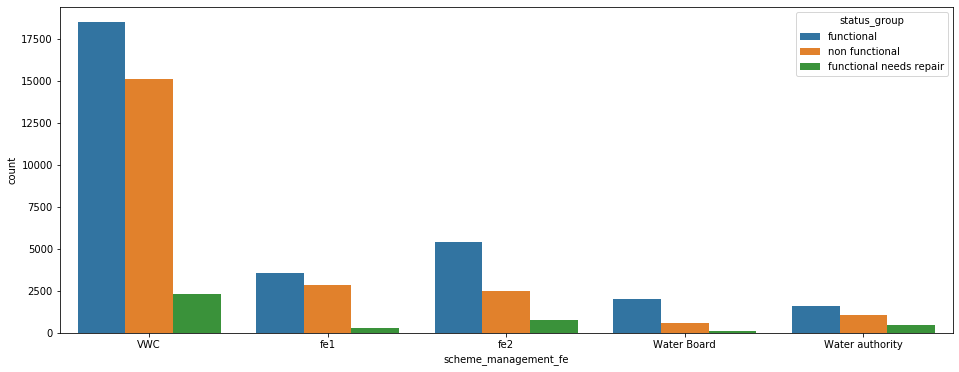

In [73]:
plt.figure(figsize=(16,6))
sns.countplot(x="scheme_management_fe", hue="status_group", data=df_features_clean);

## quantity_group

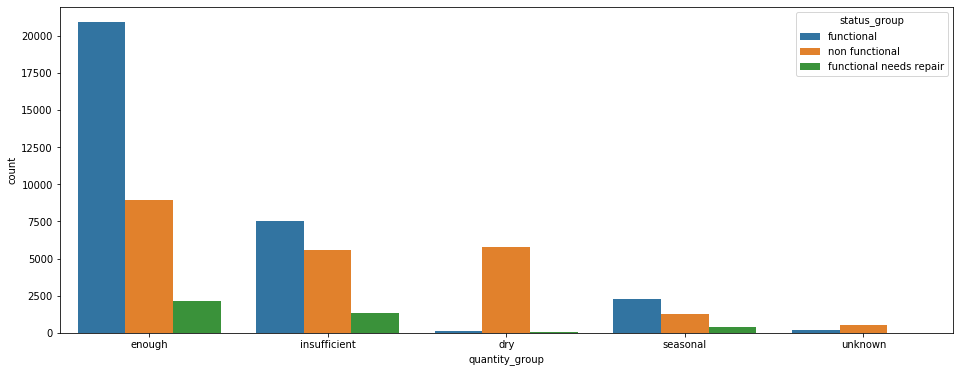

In [74]:
plt.figure(figsize=(16,6))
sns.countplot(x="quantity_group", hue="status_group", data=df_features_clean);

## quantity

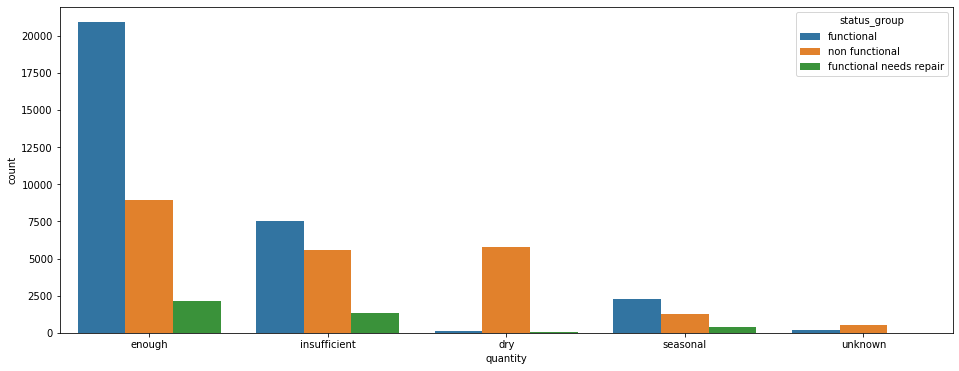

In [75]:
plt.figure(figsize=(16,6))
sns.countplot(x="quantity", hue="status_group", data=df_features_clean);

In [76]:
drop_col.add('quantity')

Duplicate column. Add to **drop_col**.

## waterpoint_type_group

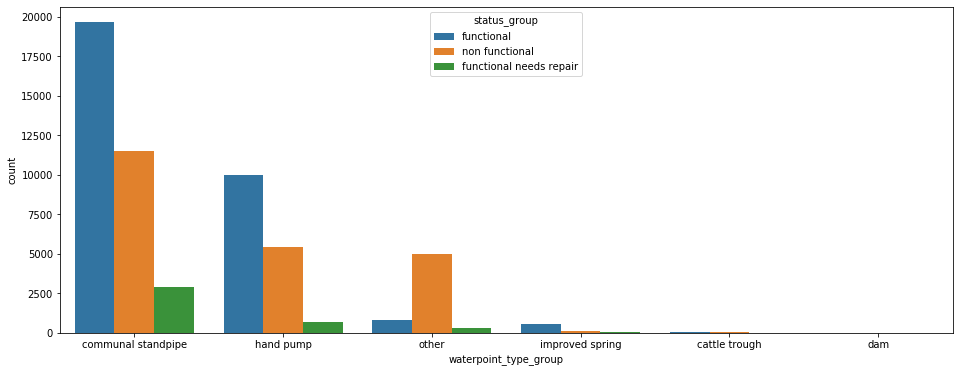

In [77]:
plt.figure(figsize=(16,6))
sns.countplot(x="waterpoint_type_group", hue="status_group", data=df_features_clean);

In [78]:
df_features_clean['waterpoint_type_group_fe'] = df_features_clean['waterpoint_type_group']
X_test_scaled['waterpoint_type_group_fe'] = X_test_scaled['waterpoint_type_group']

df_features_clean['waterpoint_type_group_fe'].replace(['improved spring', 'cattle trough', 'dam'], 'fe1', inplace = True)
X_test_scaled['waterpoint_type_group_fe'].replace(['improved spring', 'cattle trough', 'dam'], 'fe1', inplace = True)
drop_col.add('waterpoint_type_group')

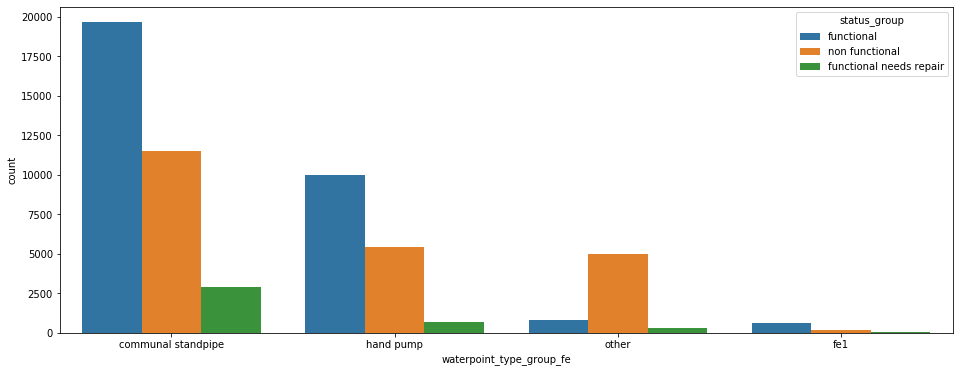

In [79]:
plt.figure(figsize=(16,6))
sns.countplot(x="waterpoint_type_group_fe", hue="status_group", data=df_features_clean);

## waterpoint_type

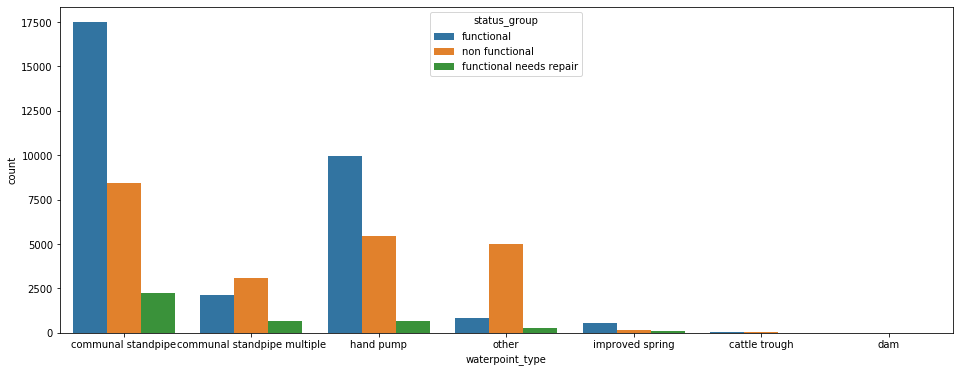

In [80]:
plt.figure(figsize=(16,6))
sns.countplot(x="waterpoint_type", hue="status_group", data=df_features_clean);

In [81]:
df_features_clean['waterpoint_type_fe'] = df_features_clean['waterpoint_type']
X_test_scaled['waterpoint_type_fe'] = X_test_scaled['waterpoint_type']

df_features_clean['waterpoint_type_fe'].replace(['improved spring', 'cattle trough', 'dam'], 'fe1', inplace = True)
X_test_scaled['waterpoint_type_fe'].replace(['improved spring', 'cattle trough', 'dam'], 'fe1', inplace = True)
drop_col.add('waterpoint_type')

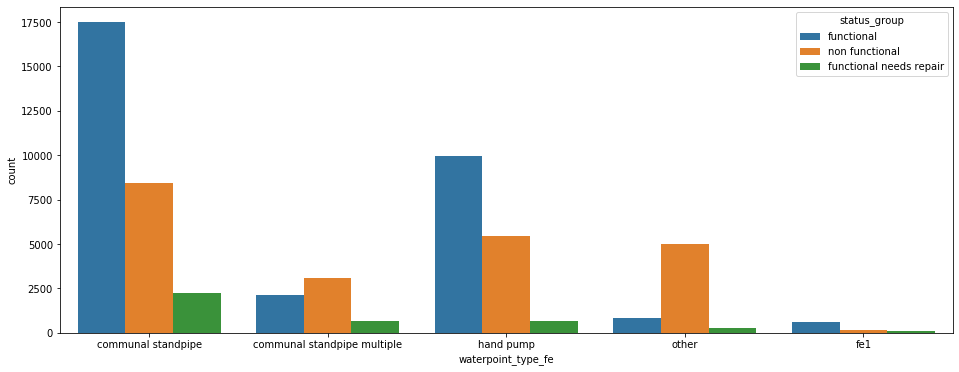

In [82]:
plt.figure(figsize=(16,6))
sns.countplot(x="waterpoint_type_fe", hue="status_group", data=df_features_clean);

## extraction_type_class

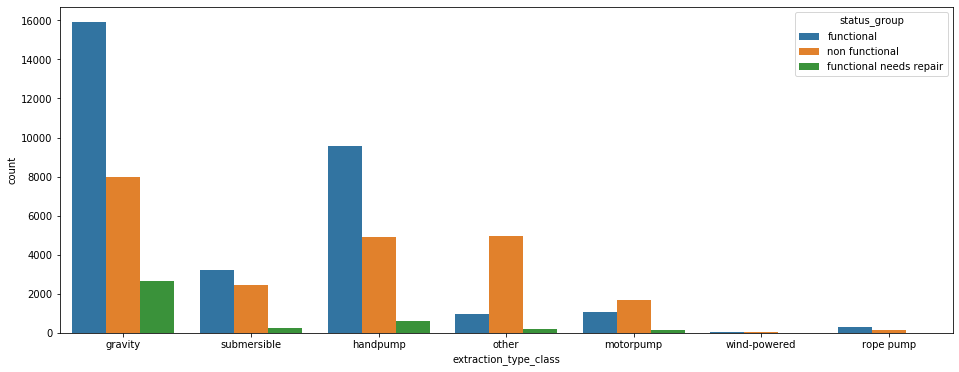

In [83]:
plt.figure(figsize=(16,6))
sns.countplot(x="extraction_type_class", hue="status_group", data=df_features_clean);

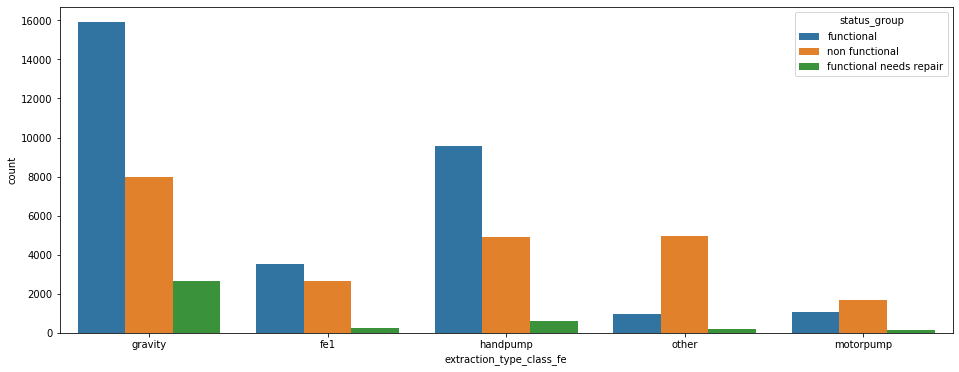

In [84]:
df_features_clean['extraction_type_class_fe'] = df_features_clean['extraction_type_class']
X_test_scaled['extraction_type_class_fe'] = X_test_scaled['extraction_type_class']

df_features_clean['extraction_type_class_fe'].replace(['rope pump', 'submersible', 'wind-powered'], 'fe1', inplace = True)
X_test_scaled['extraction_type_class_fe'].replace(['rope pump', 'submersible', 'wind-powered'], 'fe1', inplace = True)
drop_col.add('extraction_type_class')

plt.figure(figsize=(16,6))
sns.countplot(x="extraction_type_class_fe", hue="status_group", data=df_features_clean);

## extraction_type_group

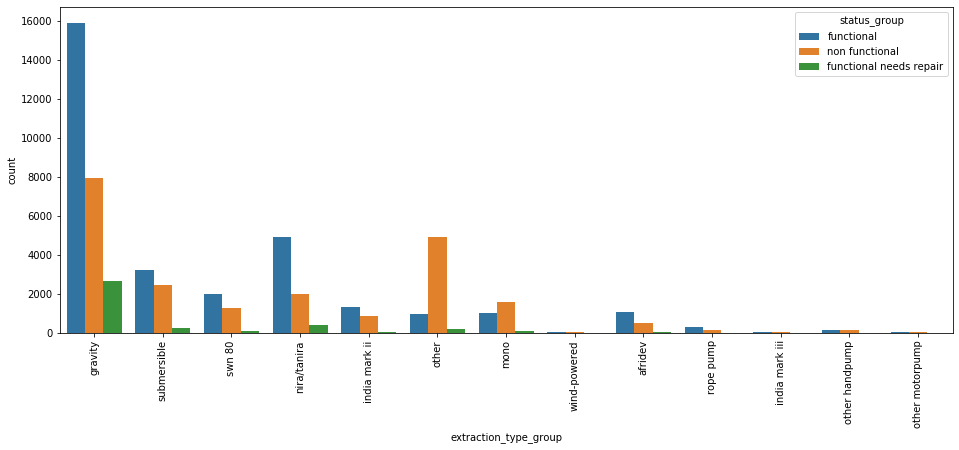

In [85]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90) 
sns.countplot(x="extraction_type_group", hue="status_group", data=df_features_clean);

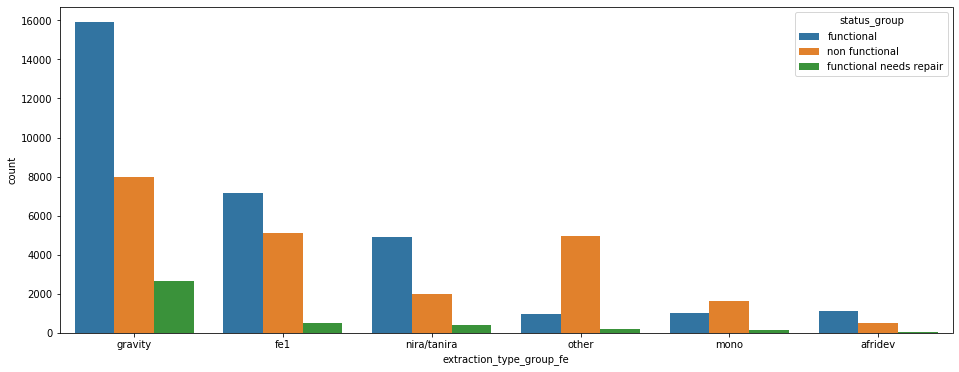

In [86]:
df_features_clean['extraction_type_group_fe'] = df_features_clean['extraction_type_group']
X_test_scaled['extraction_type_group_fe'] = X_test_scaled['extraction_type_group']

df_features_clean['extraction_type_group_fe'].replace(['submersible', 'swn 80', 'india mark ii', 'rope pump',
                                                       'wind-powered', 'other handpump', 'india mark iii',
                                                       'other motorpump'], 'fe1', inplace = True)
X_test_scaled['extraction_type_group_fe'].replace(['submersible', 'swn 80', 'india mark ii', 'rope pump',
                                                       'wind-powered', 'other handpump', 'india mark iii',
                                                       'other motorpump'], 'fe1', inplace = True)
drop_col.add('extraction_type_group')

plt.figure(figsize=(16,6))
sns.countplot(x="extraction_type_group_fe", hue="status_group", data=df_features_clean);

## extraction_type

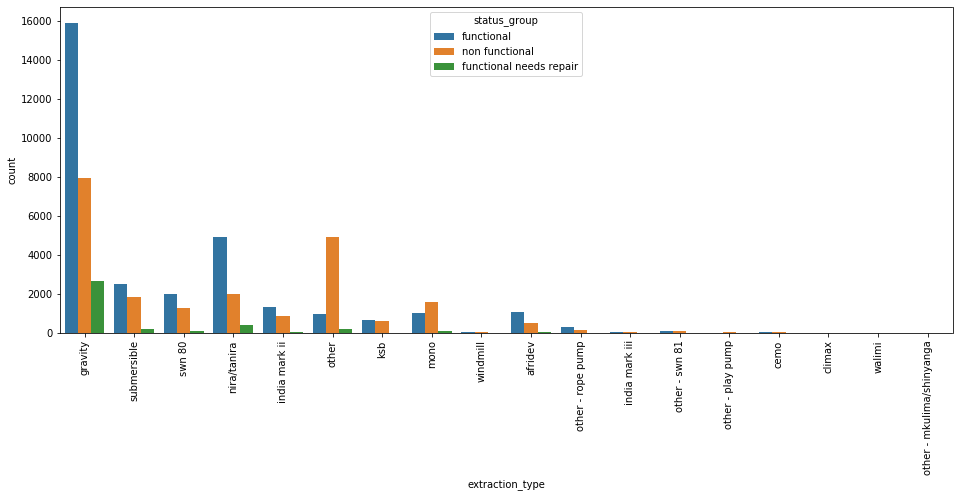

In [87]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90) 
sns.countplot(x="extraction_type", hue="status_group", data=df_features_clean);

In [88]:
drop_col.add('extraction_type')

Similar to extraction_type_group. Add to **drop_col**.

## payment

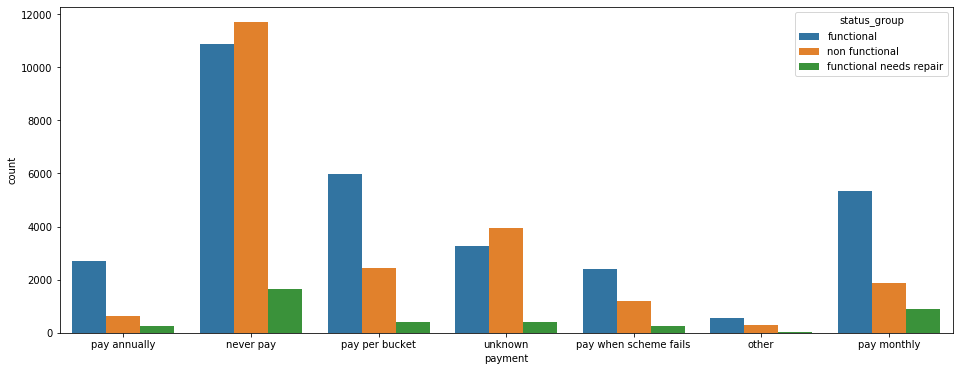

In [89]:
plt.figure(figsize=(16,6))
sns.countplot(x="payment", hue="status_group", data=df_features_clean);

## payment_type

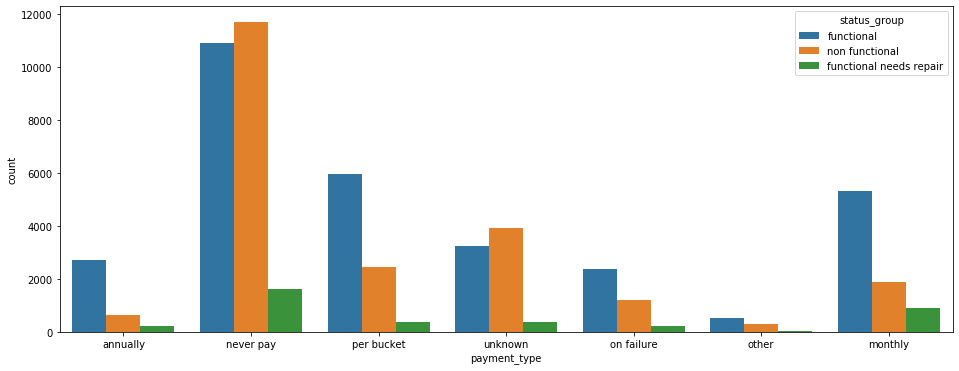

In [90]:
plt.figure(figsize=(16,6))
sns.countplot(x="payment_type", hue="status_group", data=df_features_clean);

In [91]:
drop_col.add('payment_type')

Duplicate column. Add to drop_col.

## installer

In [92]:
df_features_clean.installer.isnull().sum()
df_features_clean['installer'].fillna('NAN', inplace = True)
X_test_scaled['installer'].fillna('NAN', inplace = True)

In [93]:
nu = df_features_clean['installer'].nunique()
nu

2092

In [94]:
installer_indexes = df_features_clean.installer.isin(df_features_clean['installer'].value_counts().head(10).index)
print('Top 10 installers:')
df_features_clean['installer'].value_counts().head(10).index

Top 10 installers:


Index(['DWE', 'NAN', 'Government', 'RWE', 'Commu', 'DANIDA', 'KKKT', 'Hesawa',
       '0', 'TCRS'],
      dtype='object')

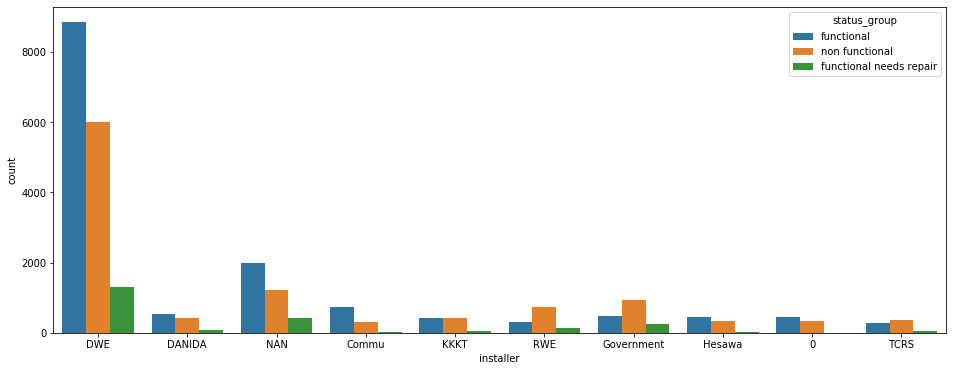

In [95]:
plt.figure(figsize=(16,6))
sns.countplot(x="installer", hue="status_group", data=df_features_clean[:][installer_indexes]);

In [96]:
installer_tail = df_features_clean['installer'].value_counts().tail(nu - 10).index

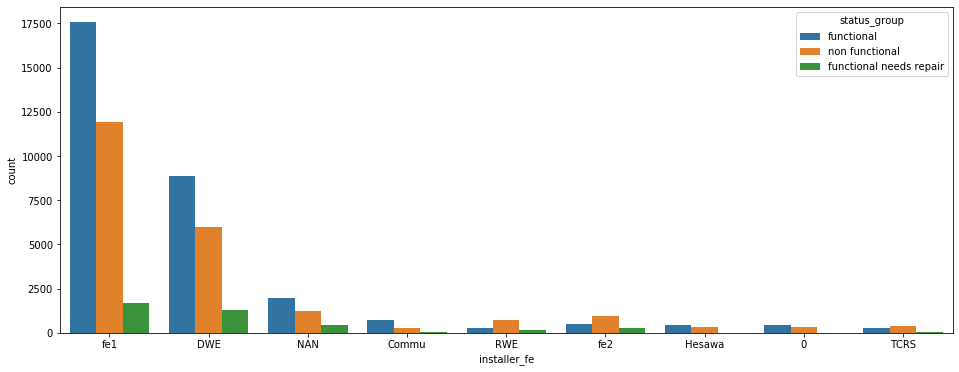

In [97]:
df_features_clean['installer_fe'] = df_features_clean['installer']
X_test_scaled['installer_fe'] = X_test_scaled['installer']

df_features_clean['installer_fe'].replace(list(installer_tail) + ['DANIDA','KKKT', 'District Council'],
                                          'fe1', inplace = True)
X_test_scaled['installer_fe'].replace(list(installer_tail) + ['DANIDA','KKKT', 'District Council'],
                                      'fe1', inplace = True)
df_features_clean['installer_fe'].replace(['LGA','Government'],
                                          'fe2', inplace = True)
X_test_scaled['installer_fe'].replace(['LGA','Government'],
                                      'fe2', inplace = True)
drop_col.add('installer')

plt.figure(figsize=(16,6))
sns.countplot(x="installer_fe", hue="status_group", data=df_features_clean);

## source

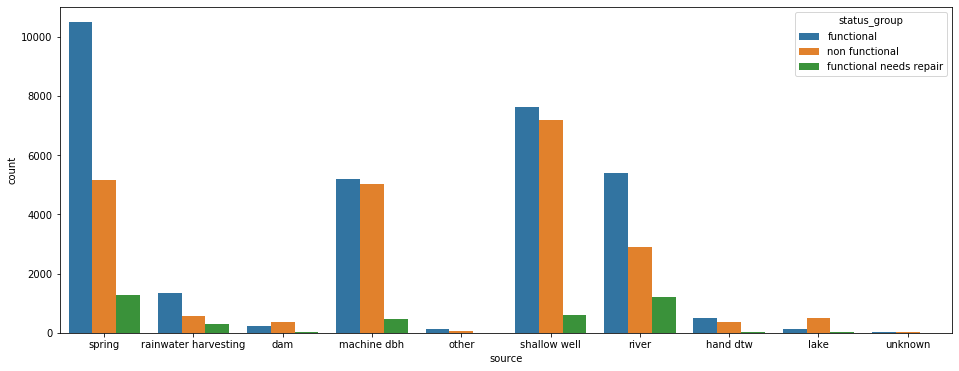

In [98]:
plt.figure(figsize=(16,6))
sns.countplot(x="source", hue="status_group", data=df_features_clean);

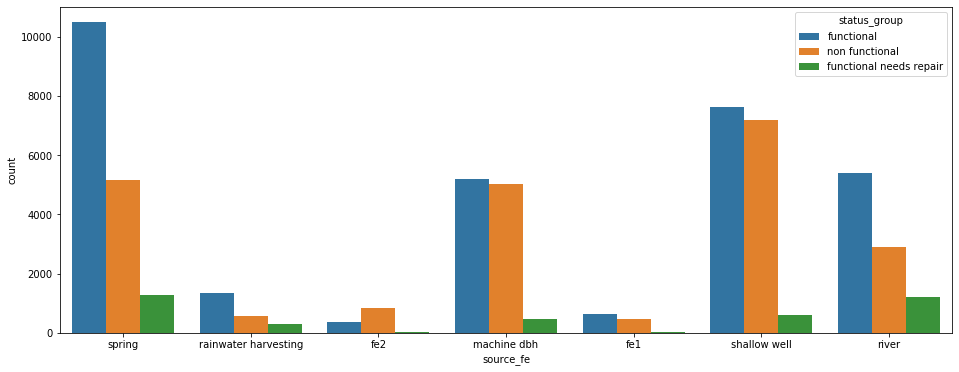

In [99]:
df_features_clean['source_fe'] = df_features_clean['source']
X_test_scaled['source_fe'] = X_test_scaled['source']

df_features_clean['source_fe'].replace(['other', 'hand dtw','unknown'],
                                          'fe1', inplace = True)
X_test_scaled['source_fe'].replace(['other', 'hand dtw','unknown'],
                                      'fe1', inplace = True)
df_features_clean['source_fe'].replace(['dam', 'lake'],
                                          'fe2', inplace = True)
X_test_scaled['source_fe'].replace(['dam', 'lake'],
                                      'fe2', inplace = True)
drop_col.add('source')

plt.figure(figsize=(16,6))
sns.countplot(x="source_fe", hue="status_group", data=df_features_clean);

## source_type

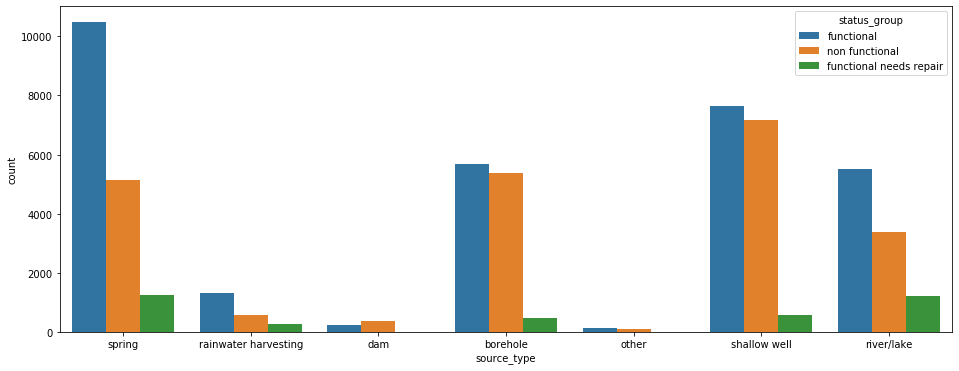

In [100]:
plt.figure(figsize=(16,6))
sns.countplot(x="source_type", hue="status_group", data=df_features_clean);

In [101]:
drop_col.add('source_type')

Duplicate column. Add to drop_col.

## basin

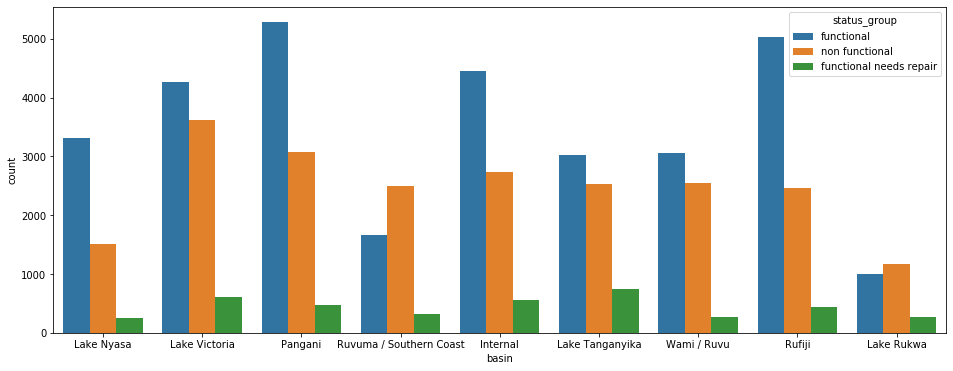

In [102]:
plt.figure(figsize=(16,6))
sns.countplot(x="basin", hue="status_group", data=df_features_clean);

## funder

In [103]:
df_features_clean.funder.isnull().sum()
df_features_clean['funder'].fillna('NAN', inplace = True)
X_test_scaled['funder'].fillna('NAN', inplace = True)

In [104]:
nu = df_features_clean['funder'].nunique()
nu

1842

In [105]:
funder_indexes = df_features_clean.funder.isin(df_features_clean['funder'].value_counts().head(10).index)
print('Top 10 funders:')
df_features_clean['funder'].value_counts().head(10).index

Top 10 funders:


Index(['Government Of Tanzania', 'NAN', 'Danida', 'Hesawa', 'World Bank',
       'Kkkt', 'World Vision', 'Rwssp', 'Unicef', 'Dhv'],
      dtype='object')

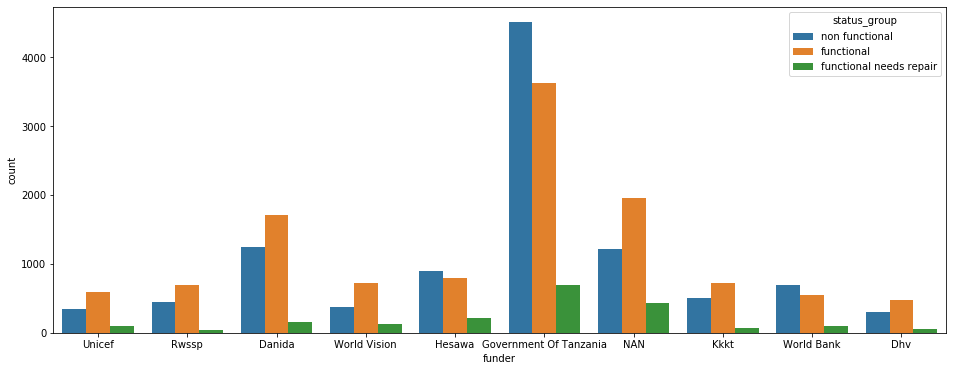

In [106]:
plt.figure(figsize=(16,6))
sns.countplot(x="funder", hue="status_group", data=df_features_clean[:][funder_indexes]);

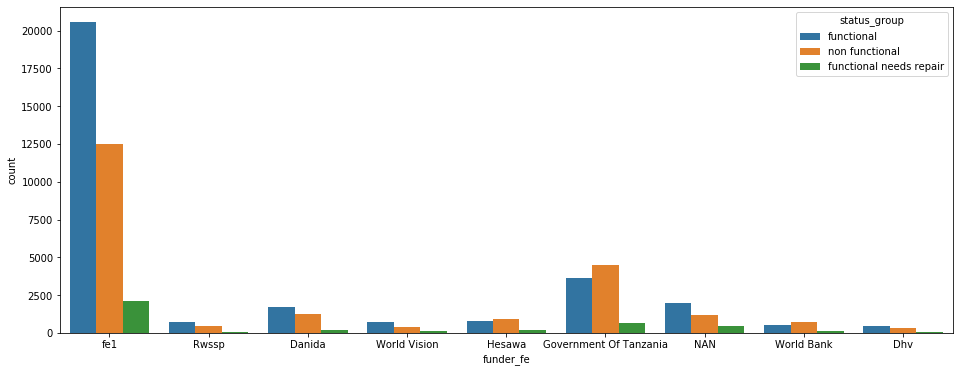

In [107]:
funder_tail = df_features_clean['funder'].value_counts().tail(nu - 10).index

df_features_clean['funder_fe'] = df_features_clean['funder']
X_test_scaled['funder_fe'] = X_test_scaled['funder']

df_features_clean['funder_fe'].replace(list(funder_tail) + ['Unicef','Kkkt'],
                                          'fe1', inplace = True)
X_test_scaled['funder_fe'].replace(list(funder_tail) + ['Unicef','Kkkt'],
                                      'fe1', inplace = True)
drop_col.add('funder')

plt.figure(figsize=(16,6))
sns.countplot(x="funder_fe", hue="status_group", data=df_features_clean);

## region

In [108]:
df_features_clean['region'].unique()

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

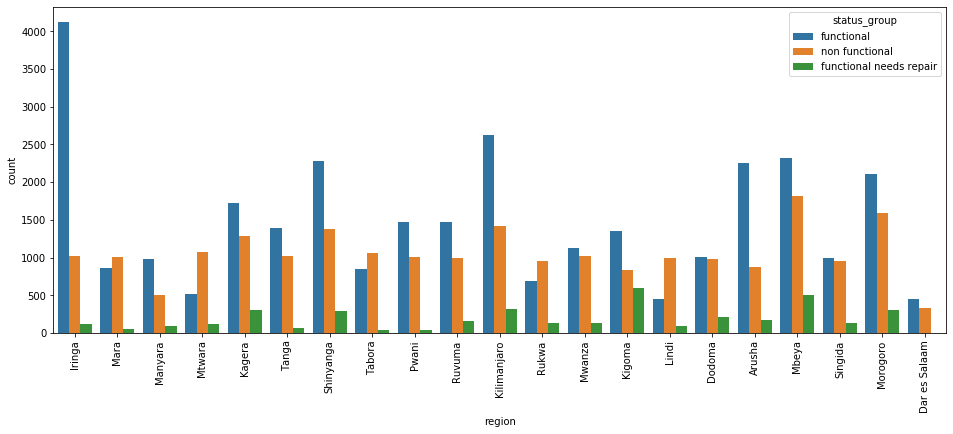

In [109]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90) 
sns.countplot(x="region", hue="status_group", data=df_features_clean);

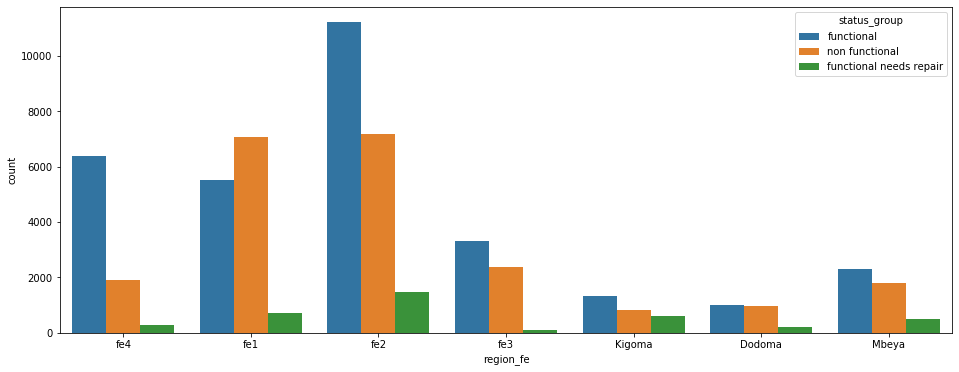

In [110]:
df_features_clean['region_fe'] = df_features_clean['region']
X_test_scaled['region_fe'] = X_test_scaled['region']

df_features_clean['region_fe'].replace(['Singida','Mara', 'Lindi', 'Rukwa', 'Mwanza',
                                        'Tabora', 'Mtwara'], 'fe1', inplace = True)
X_test_scaled['region_fe'].replace(['Singida','Mara', 'Lindi', 'Rukwa', 'Mwanza',
                                        'Tabora', 'Mtwara'], 'fe1', inplace = True)
df_features_clean['region_fe'].replace(['Manyara','Kagera', 'Ruvuma', 'Shinyanga', 'Kilimanjaro',
                                        'Morogoro'], 'fe2', inplace = True)
X_test_scaled['region_fe'].replace(['Manyara','Kagera', 'Ruvuma', 'Shinyanga', 'Kilimanjaro',
                                        'Morogoro'], 'fe2', inplace = True)
df_features_clean['region_fe'].replace(['Tanga','Pwani', 'Dar es Salaam'], 'fe3', inplace = True)
X_test_scaled['region_fe'].replace(['Tanga','Pwani', 'Dar es Salaam'], 'fe3', inplace = True)

df_features_clean['region_fe'].replace(['Iringa','Arusha'], 'fe4', inplace = True)
X_test_scaled['region_fe'].replace(['Iringa','Arusha'], 'fe4', inplace = True)

drop_col.add('region')

plt.figure(figsize=(16,6))
sns.countplot(x="region_fe", hue="status_group", data=df_features_clean);

## wpt_name

In [111]:
wpt_name_indexes = df_features_clean.wpt_name.isin(df_features_clean['wpt_name'].value_counts().head(15).index)

In [112]:
nu = df_features_clean['wpt_name'].nunique()
nu

36438

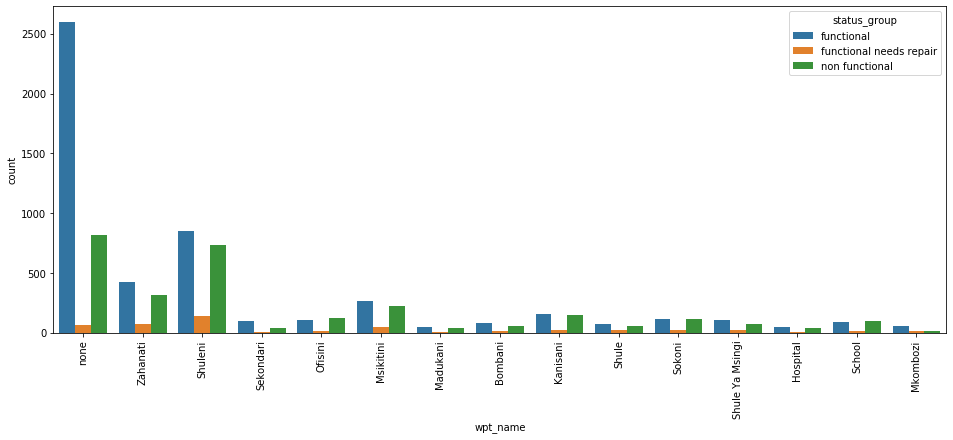

In [113]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90) 
sns.countplot(x="wpt_name", hue="status_group", data=df_features_clean[:][wpt_name_indexes]);

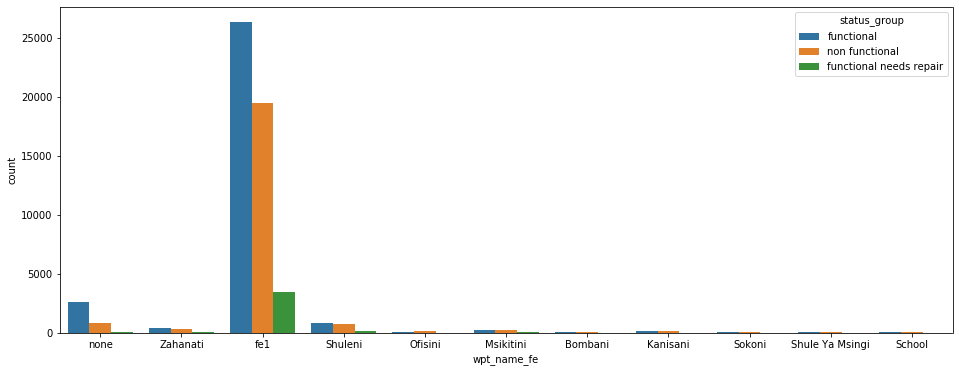

In [114]:
wpt_name_tail = df_features_clean['wpt_name'].value_counts().tail(nu - 10).index

df_features_clean['wpt_name_fe'] = df_features_clean['wpt_name']
X_test_scaled['wpt_name_fe'] = X_test_scaled['wpt_name']

df_features_clean['wpt_name_fe'].replace(list(wpt_name_tail),
                                          'fe1', inplace = True)
X_test_scaled['wpt_name_fe'].replace(list(wpt_name_tail),
                                      'fe1', inplace = True)
drop_col.add('wpt_name')

plt.figure(figsize=(16,6))
sns.countplot(x="wpt_name_fe", hue="status_group", data=df_features_clean);

## lga

In [115]:
lga_indexes = df_features_clean.lga.isin(df_features_clean['lga'].value_counts().head(15).index)
df_features_clean['lga'].value_counts().count()

124

In [116]:
nu = df_features_clean['lga'].nunique()
nu

124

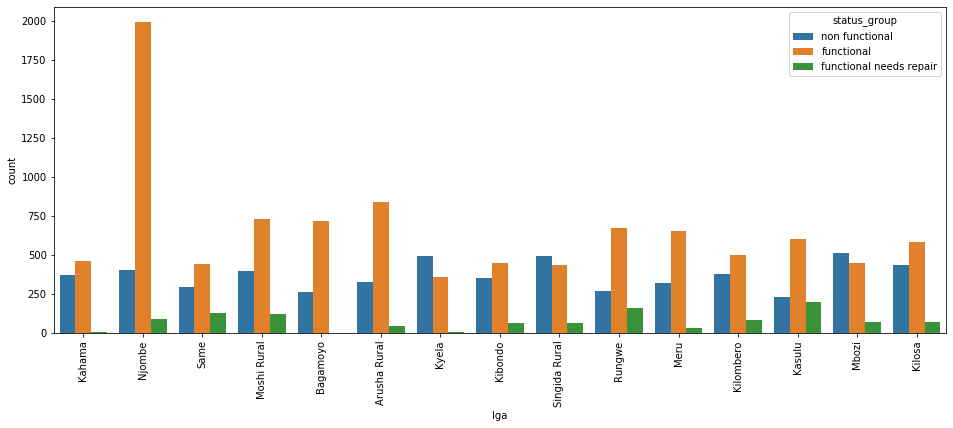

In [117]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90) 
sns.countplot(x="lga", hue="status_group", data=df_features_clean[:][lga_indexes]);

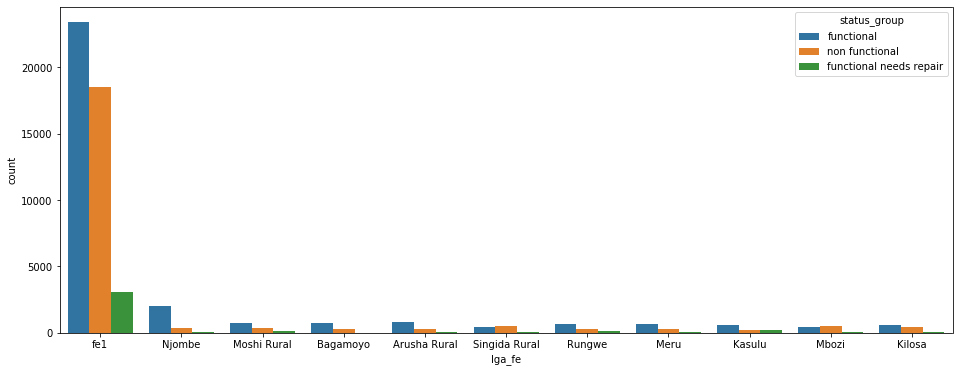

In [118]:
lga_tail = df_features_clean['lga'].value_counts().tail(nu - 10).index

df_features_clean['lga_fe'] = df_features_clean['lga']
X_test_scaled['lga_fe'] = X_test_scaled['lga']

df_features_clean['lga_fe'].replace(list(lga_tail),
                                          'fe1', inplace = True)
X_test_scaled['lga_fe'].replace(list(lga_tail),
                                      'fe1', inplace = True)
drop_col.add('lga')

plt.figure(figsize=(16,6))
sns.countplot(x="lga_fe", hue="status_group", data=df_features_clean);

## scheme_name

In [119]:
df_features_clean['scheme_name'].fillna('NAN', inplace = True)
X_test_scaled['scheme_name'].fillna('NAN', inplace = True)

In [120]:
scheme_name_indexes = df_features_clean.scheme_name.isin(df_features_clean['scheme_name'].value_counts().head(15).index)
nu = df_features_clean['scheme_name'].nunique()
nu

2630

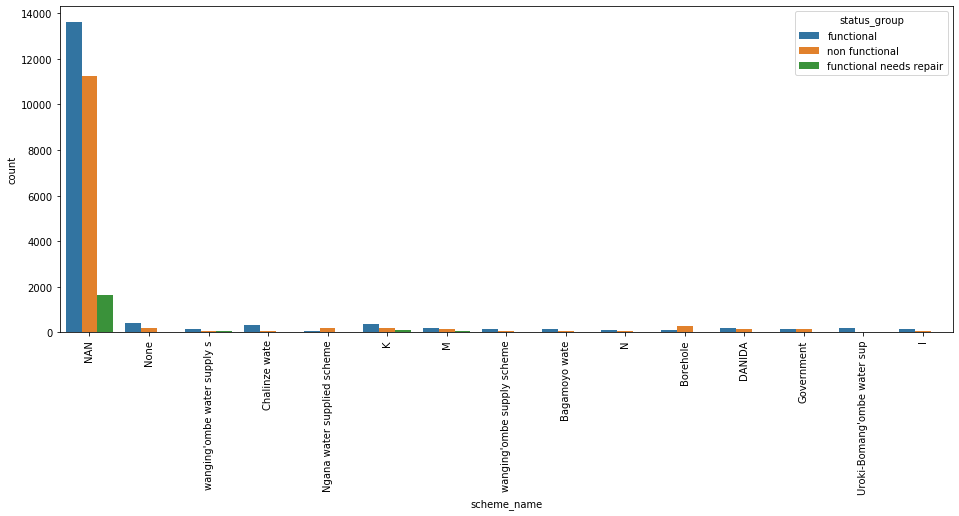

In [121]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90) 
sns.countplot(x="scheme_name", hue="status_group", data=df_features_clean[:][scheme_name_indexes]);

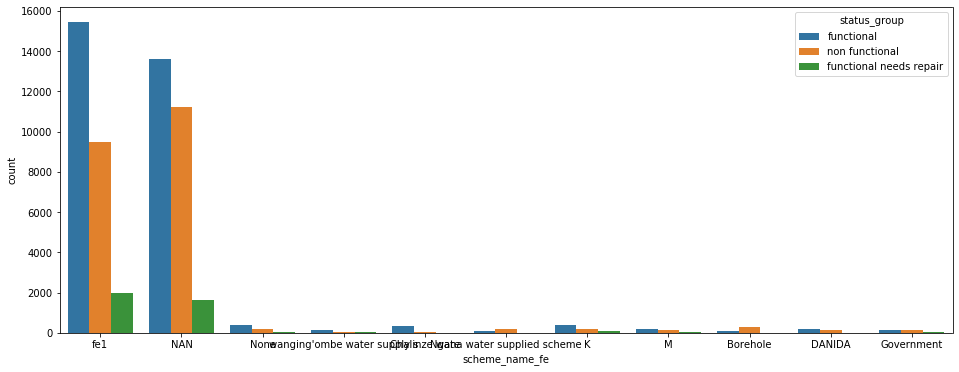

In [122]:
scheme_name_tail = df_features_clean['scheme_name'].value_counts().tail(nu - 10).index

df_features_clean['scheme_name_fe'] = df_features_clean['scheme_name']
X_test_scaled['scheme_name_fe'] = X_test_scaled['scheme_name']

df_features_clean['scheme_name_fe'].replace(list(scheme_name_tail),
                                          'fe1', inplace = True)
X_test_scaled['scheme_name_fe'].replace(list(scheme_name_tail),
                                      'fe1', inplace = True)
drop_col.add('scheme_name')

plt.figure(figsize=(16,6))
sns.countplot(x="scheme_name_fe", hue="status_group", data=df_features_clean);

In [123]:
drop_col.add('scheme_name_fe')

Too many NAN. Add to **drop_col**

## subvillage

In [124]:
df_features_clean['subvillage'].head()

id
69572      Mnyusi B
8776        Nyamara
34310       Majengo
67743    Mahakamani
19728    Kyanyamisa
Name: subvillage, dtype: object

In [125]:
df_features_clean['subvillage'].nunique()

18474

In [126]:
drop_col.add('subvillage')

Name of village. Add to **drop_col**

## ward

In [127]:
df_features_clean['ward'].head()

id
69572      Mundindi
8776          Natta
34310       Ngorika
67743      Nanyumbu
19728    Nyakasimbi
Name: ward, dtype: object

In [128]:
df_features_clean['ward'].nunique()

2029

In [129]:
df_features_clean['ward'].value_counts().head(5)

Igosi        307
Imalinyi     242
Siha Kati    232
Mdandu       226
Nduruma      217
Name: ward, dtype: int64

In [130]:
drop_col.add('ward')

Too many unique, max count - 459. Add to **drop_col**

## date_recorded

In [131]:
df_features_clean['date'] = df_features_clean['date_recorded'].astype('datetime64')
df_features_clean['year'], df_features_clean['month'] = (df_features_clean['date'].dt.year,
                                                        df_features_clean['date'].dt.month,)

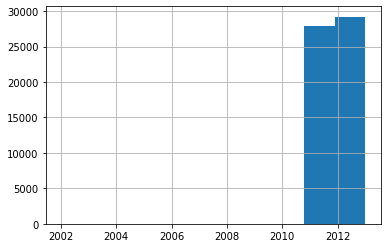

In [132]:
df_features_clean['year'].hist()

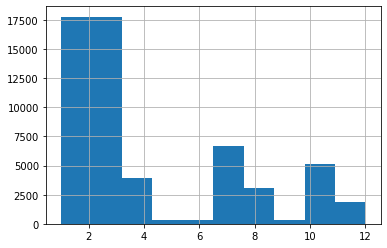

In [133]:
df_features_clean['month'].hist()

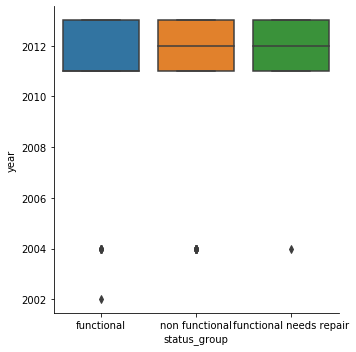

In [134]:
sns.catplot(x="status_group", y='year', kind="box", data=df_features_clean);

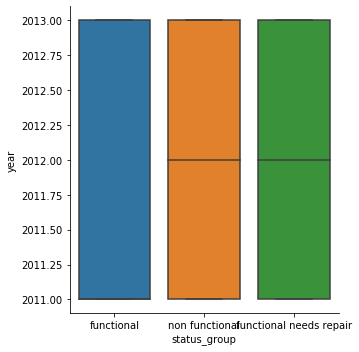

In [135]:
year_indexes = (df_features_clean[:][df_features_clean['year'] < 2008]).index
df_features_clean.drop(year_indexes, axis = 0, inplace = True)
sns.catplot(x="status_group", y='year', kind="box", data=df_features_clean);

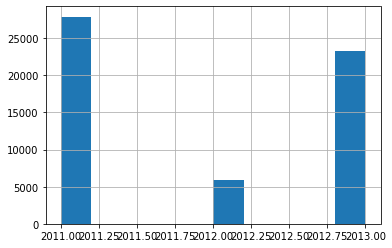

In [136]:
df_features_clean['year'].hist()

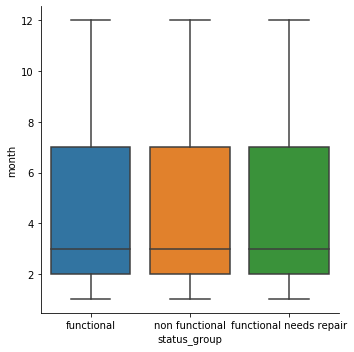

In [137]:
sns.catplot(x="status_group", y='month', kind="box", data=df_features_clean);

In [138]:
drop_col.add('month')
drop_col.add('year')
drop_col.add('date')
drop_col.add('date_recorded')

## Model training

In [139]:
df_fe = df_features_clean.drop(drop_col, axis = 1)
X_test_fe = X_test_scaled.drop(set.intersection(set(X_test_scaled.columns), drop_col), axis = 1)
labels = df_fe['status_group']
train = df_fe.drop('status_group', axis = 1)

In [140]:
cat_train_columns = train.columns[train.dtypes == 'object']

In [141]:
cat_train_columns

Index(['basin', 'public_meeting', 'permit', 'management_group', 'payment',
       'water_quality', 'quality_group', 'quantity_group', 'management_fe',
       'scheme_management_fe', 'waterpoint_type_group_fe',
       'waterpoint_type_fe', 'extraction_type_class_fe',
       'extraction_type_group_fe', 'installer_fe', 'source_fe', 'funder_fe',
       'region_fe', 'wpt_name_fe', 'lga_fe'],
      dtype='object')

In [142]:
X_train, X_val, y_train, y_val = train_test_split(train, labels, test_size=0.2, random_state=42)
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_train_columns)
test_pool = Pool(data=X_val, label=y_val, cat_features=cat_train_columns) 

In [143]:
%%bot_obs - telegram note, when cv finish
# manual coordinate descent
model = CatBoostClassifier(
    iterations=25000,
    learning_rate=0.1,
    random_strength=0.1,
    depth=4,
    loss_function='MultiClass',
    one_hot_max_size = 10,
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    random_state = 42
)
model.fit(train_pool, eval_set = test_pool, plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [144]:
%%bot_obs - telegram note, when cv finish
# manual coordinate descent
model = CatBoostClassifier(
    iterations=25000,
    learning_rate=0.1,
    random_strength=0.1,
    depth=4,
    l2_leaf_reg = 10,
    loss_function='MultiClass',
    one_hot_max_size = 10,
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    random_state = 42
)
model.fit(train_pool, eval_set = test_pool, plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [145]:
%%bot_obs - telegram note, when cv finish
# manual coordinate descent
model = CatBoostClassifier(
    iterations=25000,
    learning_rate=0.03,
    random_strength=0.1,
    depth=4,
    loss_function='MultiClass',
    one_hot_max_size = 10,
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    random_state = 42
)
model.fit(train_pool, eval_set = test_pool, plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [146]:
%%bot_obs - telegram note, when cv finish
# manual coordinate descent
model = CatBoostClassifier(
    iterations=25000,
    learning_rate=0.03,
    random_strength=0.1,
    depth=10,
    loss_function='MultiClass',
    one_hot_max_size = 10,
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    random_state = 42
)
model.fit(train_pool, eval_set = test_pool, plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [147]:
%%bot_obs - telegram note, when cv finish
# manual coordinate descent
model = CatBoostClassifier(
    iterations=25000,
    learning_rate=0.1,
    random_strength=0.1,
    depth=10,
    l2_leaf_reg = 10,
    loss_function='MultiClass',
    one_hot_max_size = 10,
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    random_state = 42
)
model.fit(train_pool, eval_set = test_pool, plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [148]:
%%bot_obs - telegram note, when cv finish
# manual coordinate descent
model = CatBoostClassifier(
    iterations=25000,
    learning_rate=0.03,
    random_strength=0.1,
    depth=10,
    l2_leaf_reg = 10,
    loss_function='MultiClass',
    one_hot_max_size = 10,
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    random_state = 42
)
model.fit(train_pool, eval_set = test_pool, plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [149]:
# %%bot_obs - telegram note, when cv finish

from catboost import Pool, cv
cv_dataset = Pool(data=train,
                  label=labels,
                  cat_features=cat_train_columns)

params = {'iterations':25000,
    'learning_rate':0.1,
    'random_strength':0.1,
    'depth':8,
    'loss_function':'MultiClass',
    'one_hot_max_size':10,
    'eval_metric':'Accuracy',
    'leaf_estimation_method':'Newton'}


scores = cv(cv_dataset,
            params,
            fold_count=5, 
            plot="True",
           verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

KeyboardInterrupt: 

In [151]:
cv_dataset = Pool(data=train,
                  label=labels,
                  cat_features=cat_train_columns)

model = CatBoostClassifier(
    iterations=7000,
    learning_rate=0.03,
    random_strength=0.1,
    depth=10,
    loss_function='MultiClass',
    one_hot_max_size = 10,
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    random_state = 42
)
model.fit(cv_dataset, plot=True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [152]:
X_test_fe.head()

gps_height  longitude  latitude                    basin  \
id                                                                
50785    1.915572   0.184758  0.558839                 Internal   
51630    1.299508   0.392742  0.813586                  Pangani   
17168    1.296623   0.105131  0.238184                 Internal   
45559   -0.578980   0.606120 -1.260233  Ruvuma / Southern Coast   
49871    0.853692   0.141411 -1.780173  Ruvuma / Southern Coast   

       district_code public_meeting permit  construction_year  \
id                                                              
50785      -0.272978           True   True           0.747518   
51630      -0.376781           True   True           0.734908   
17168      -0.376781           True    NAN           0.745416   
45559       3.879171            NAN   True           0.721247   
49871      -0.272978            NAN   True           0.734908   

      management_group      payment water_quality quality_group  \
id                                                                
50785       parastatal    never pay          soft          good   
51630       user-group    never pay          soft          good   
17168       user-group    never pay          soft          good   
45559       user-group      unknown          soft          good   
49871       user-group  pay monthly          soft          good   

      quantity_group  population_boxcox  quality_group_good  \
id                                                            
50785       seasonal           0.206036                True   
51630   insufficient           0.184152                True   
17168   insufficient           0.329027                True   
45559            dry           0.121777                True   
49871         enough          -0.393436                True   

       water_quality_soft  source_class_ground management_fe  \
id                                                             
50785                True                False           fe2   
51630                True                 True           vwc   
17168                True                False           vwc   
45559                True                 True           vwc   
49871                True                 True           fe2   

      scheme_management_fe waterpoint_type_group_fe  waterpoint_type_fe  \
id                                                                        
50785                  fe2                    other               other   
51630                  VWC       communal standpipe  communal standpipe   
17168                  VWC                    other               other   
45559                  VWC                    other               other   
49871          Water Board       communal standpipe  communal standpipe   

      extraction_type_class_fe extraction_type_group_fe installer_fe  \
id                                                                     
50785                    other                    other          fe1   
51630                  gravity                  gravity          DWE   
17168                    other                    other          NAN   
45559                    other                    other          fe1   
49871                  gravity                  gravity          fe1   

                  source_fe               funder_fe region_fe  \
id                                                              
50785  rainwater harvesting                     fe1       fe2   
51630                spring  Government Of Tanzania       fe4   
17168  rainwater harvesting                     NAN       fe1   
45559          shallow well                     fe1       fe1   
49871                spring                     fe1       fe2   

                   wpt_name_fe         lga_fe  
id                                             
50785  Dinamu Secondary School            fe1  
51630                  Kimnyak   Arusha Rural  
17168                      fe1  Singida R

In [154]:
y_test = model.predict(X_test_fe)

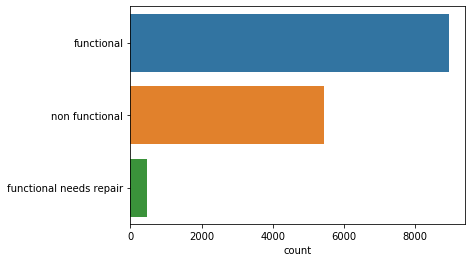

In [155]:
sns.countplot(y=np.ravel(y_test));

In [156]:
output = pd.DataFrame({'id': X_test_fe.index, 'status_group': np.ravel(y_test)})
output.to_csv('submission3.csv', index = False)

In [ ]:
model.save_model("taarifa_water", format="cbm")